In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [45]:
raw_data = pd.read_csv("C:/Users/Savita bhabhi/Desktop/ML/AnalyticsVidya/train_fNxu4vz.csv")

In [46]:
raw_data.head()
raw_data.shape

raw_data[raw_data.columns[:]].corr()['Interest_Rate'][:]

Loan_ID                    0.001290
Loan_Amount_Requested      0.132486
Annual_Income             -0.052783
Debt_To_Income             0.152472
Inquiries_Last_6Mo         0.188987
Months_Since_Deliquency   -0.042108
Number_Open_Accounts       0.002847
Total_Accounts            -0.040690
Interest_Rate              1.000000
Name: Interest_Rate, dtype: float64

In [47]:
X= raw_data.drop('Interest_Rate',axis=1)
y = raw_data['Interest_Rate']

In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 13 columns):
Loan_ID                    164309 non-null int64
Loan_Amount_Requested      164309 non-null float64
Length_Employed            156938 non-null object
Home_Owner                 138960 non-null object
Annual_Income              139207 non-null float64
Income_Verified            164309 non-null object
Purpose_Of_Loan            164309 non-null object
Debt_To_Income             164309 non-null float64
Inquiries_Last_6Mo         164309 non-null int64
Months_Since_Deliquency    75930 non-null float64
Number_Open_Accounts       164309 non-null int64
Total_Accounts             164309 non-null int64
Gender                     164309 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 16.3+ MB


In [49]:
X=X.drop('Months_Since_Deliquency',axis=1)


In [50]:
X['Home_Owner'].isnull().value_counts()
X['Annual_Income'].isnull().value_counts()
X['Length_Employed'].isnull().value_counts()

False    156938
True       7371
Name: Length_Employed, dtype: int64

In [51]:
y.value_counts()
#Output var looks balanced

2    70580
3    59923
1    33806
Name: Interest_Rate, dtype: int64

In [52]:
X.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender
0,10000001,7000.0,< 1 year,Rent,68000.0,not verified,car,18.37,0,9,14,Female
1,10000002,30000.0,4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female
2,10000003,24725.0,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male
3,10000004,16000.0,< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male
4,10000005,17000.0,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female


In [53]:
X_loan_id = X['Loan_ID']

In [54]:
X=X.drop('Loan_ID',axis=1)

In [55]:
X.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender
0,7000.0,< 1 year,Rent,68000.0,not verified,car,18.37,0,9,14,Female
1,30000.0,4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female
2,24725.0,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male
3,16000.0,< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male
4,17000.0,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female


In [56]:
#X.groupby(['Gender'])['Debt_To_Income'].value_counts(normalize=True)
#L = income.map({' <=50K':0,' >50K':1})
X['Length_Employed'].value_counts()
X['Length_Employed'] = X['Length_Employed'].map({'< 1 year':0,'1 years':1,'2 years':2,'3 years':3,'4 years':4,'5 years':5,'6 years':6,'7 years':7,'8 years':8,'9 years':9,'10+ years':10 })

X['Income_Verified'] = X['Income_Verified'].map( {'not verified': 0, 'VERIFIED - income': 1, 'VERIFIED - income source': 1})



In [57]:
(X['Length_Employed'].replace(r' ', np.nan, regex=True))


0          0.0
1          4.0
2          7.0
3          0.0
4          8.0
5          2.0
6          4.0
7          0.0
8         10.0
9         10.0
10        10.0
11        10.0
12        10.0
13        10.0
14        10.0
15         4.0
16        10.0
17        10.0
18        10.0
19         NaN
20        10.0
21         7.0
22        10.0
23         NaN
24        10.0
25         7.0
26        10.0
27        10.0
28         8.0
29         6.0
          ... 
164279    10.0
164280    10.0
164281    10.0
164282     5.0
164283     9.0
164284    10.0
164285     6.0
164286    10.0
164287    10.0
164288     2.0
164289     NaN
164290     8.0
164291     7.0
164292     8.0
164293    10.0
164294     NaN
164295     NaN
164296    10.0
164297     5.0
164298     NaN
164299     3.0
164300     NaN
164301     6.0
164302     2.0
164303    10.0
164304    10.0
164305     8.0
164306    10.0
164307     4.0
164308    10.0
Name: Length_Employed, Length: 164309, dtype: float64

In [58]:
X['Home_Owner'].fillna(X['Home_Owner'].mode()[0], inplace=True)
X['Annual_Income'].fillna(X['Annual_Income'].mean(), inplace=True)
X['Length_Employed'].fillna(X['Length_Employed'].mean(),inplace=True)


In [59]:
X['Length_Employed'].isnull().value_counts()

False    164309
Name: Length_Employed, dtype: int64

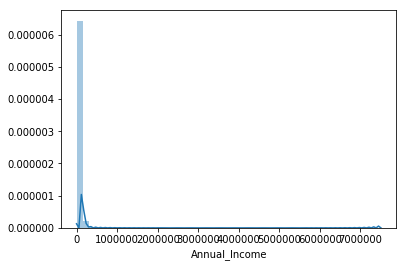

In [60]:
sns.distplot(X['Annual_Income'])

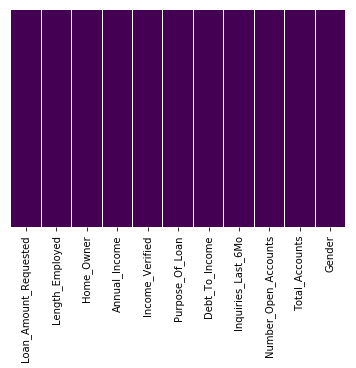

In [61]:
sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [62]:
X.head(10)
X.columns

Index(['Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Number_Open_Accounts', 'Total_Accounts',
       'Gender'],
      dtype='object')

In [63]:
X['Home_Owner'].value_counts()

X['Home_Owner'] = X['Home_Owner'].map( {'None': 0, 'Other': 1, 'Rent': 2, 'Mortgage': 3, 'Own': 4})

#sns.distplot(X['Annual_Income'])

#X['Annual_Income'] = X['Annual_Income'].apply(lambda x: np.log(x + 1))
X.head()
X['Loan_Amount_Requested'] = pd.to_numeric(X['Loan_Amount_Requested'],errors='coerce')
X['Loan_Amount_Requested'] = X['Loan_Amount_Requested'].astype(int)


In [64]:
columns_to_norm = ['Loan_Amount_Requested','Length_Employed','Home_Owner','Annual_Income', 'Debt_To_Income','Inquiries_Last_6Mo', 'Number_Open_Accounts', 'Total_Accounts']
scaler = StandardScaler()
X[columns_to_norm] = scaler.fit_transform(X[columns_to_norm])
X.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender
0,-0.887404,-1.924456,-1.244176,-0.095929,0,car,0.148222,-0.755451,-0.439484,-0.955507,Female
1,1.889756,-0.711890,0.449872,0.000000,1,debt_consolidation,-0.290270,-0.755451,0.161501,-0.092175,Female
2,1.252820,0.197533,0.449872,0.040221,1,debt_consolidation,-0.169175,-0.755451,0.161501,-0.782840,Male
3,0.199311,-1.924456,0.449872,-0.308977,1,debt_consolidation,-0.365477,2.143818,0.962816,-0.264841,Male
4,0.320057,0.500675,2.143921,0.407902,1,debt_consolidation,0.632603,0.210972,1.563802,0.425824,Female


In [65]:
X.skew()

Loan_Amount_Requested     0.727216
Length_Employed          -0.404690
Home_Owner                0.133823
Annual_Income            43.701745
Income_Verified          -0.793027
Debt_To_Income            0.192204
Inquiries_Last_6Mo        1.550867
Number_Open_Accounts      1.164084
Total_Accounts            0.817347
dtype: float64

In [66]:
#Onehot Encoding 
from sklearn.preprocessing import OneHotEncoder

X_encoded = pd.get_dummies(X)
#X_encoded = X_encoded.drop(['Workclass_?'], axis=1,inplace =True)
X_encoded.head(10)


,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Purpose_Of_Loan_car,...,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Female,Gender_Male
0,-0.887404,-1.924456,-1.244176,-0.095929,0,0.148222,-0.755451,-0.439484,-0.955507,1,...,0,0,0,0,0,0,0,0,1,0
1,1.889756,-0.711890,0.449872,0.000000,1,-0.290270,-0.755451,0.161501,-0.092175,0,...,0,0,0,0,0,0,0,0,1,0
2,1.252820,0.197533,0.449872,0.040221,1,-0.169175,-0.755451,0.161501,-0.782840,0,...,0,0,0,0,0,0,0,0,0,1
3,0.199311,-1.924456,0.449872,-0.308977,1,-0.365477,2.143818,0.962816,-0.264841,0,...,0,0,0,0,0,0,0,0,0,1
4,0.320057,0.500675,2.143921,0.407902,1,0.632603,0.210972,1.563802,0.425824,0,...,0,0,0,0,0,0,0,0,1,0
5,-1.189269,-1.318173,-1.244176,-0.779699,1,-0.806519,0.210972,0.161501,-0.869174,0,...,0,0,0,0,0,0,0,0,0,1
6,0.449859,-0.711890,-1.244176,0.209969,1,-1.473181,-0.755451,-0.439484,-1.128173,0,...,0,0,0,0,0,0,0,0,0,1
7,0.078565,-1.924456,-1.244176,0.749787,1,-1.177453,0.210972,2.765773,0.512157,0,...,0,0,0,0,0,0,0,0,1,0
8,-0.971926,1.106957,-1.244176,0.000000,0,-0.138583,2.143818,-0.639813,-1.387173,0,...,0,0,0,0,0,0,0,0,1,0
9,1.889756,1.106957,2.143921,1.613497,1,-0.774652,-0.755451,2.565445,1.548156,0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
X = X_encoded

In [68]:
#train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state =42)
X_train.shape

(115016, 25)

In [101]:
from sklearn.metrics import f1_score

In [104]:
# Function to define Pipeline 


def pipeline(clf_name, X_train,X_test,y_train,y_test):
    
    start_time = time.time()
    clf_name.fit(X_train,y_train)
    end_time = time.time()
    clf_time = end_time - start_time
    print("Time taken by {} :{} seconds ".format((clf_name), (clf_time)))
    
    y_pred = clf_name.predict(X_test)
    
        
    #Accuracy score
    from sklearn.metrics import accuracy_score
    
    clf_acc = accuracy_score(y_test,y_pred)
    
    print( "Accuracy Score for {} : {}".format(clf_name , clf_acc))
    
  
   
    F1_score = f1_score(y_test,y_pred_RF,average = 'weighted')

    print(" F1 score for clf_name {:.4f}".format(F1_score))
    


# In[101]:


from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier



clf_Ada = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_lr = LogisticRegression()
clf_KNN = KNeighborsClassifier(n_neighbors=5,n_jobs = -1)
clf_NB = GaussianNB()
clf_DT = DecisionTreeClassifier(criterion='gini', max_depth=5)
clf_SVM = SVC(random_state=0)
clf_RF  = RandomForestClassifier(n_estimators =100,max_depth =25)

results = {}

for clf in [ clf_RF]:
    results[clf] = pipeline(clf, X_train,X_test,y_train,y_test)
    print(results)
    

    

Time taken by AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=0) :7.407315969467163 seconds 
Accuracy Score for AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=0) : 0.5203172864301219
 F1 score for clf_name 0.4776
{AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=0): None}


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109541 entries, 0 to 109540
Data columns (total 13 columns):
Loan_ID                    109541 non-null int64
Loan_Amount_Requested      109541 non-null int64
Length_Employed            104605 non-null object
Home_Owner                 92830 non-null object
Annual_Income              92643 non-null float64
Income_Verified            109541 non-null object
Purpose_Of_Loan            109541 non-null object
Debt_To_Income             109541 non-null float64
Inquiries_Last_6Mo         109541 non-null int64
Months_Since_Deliquency    50682 non-null float64
Number_Open_Accounts       109541 non-null int64
Total_Accounts             109541 non-null int64
Gender                     109541 non-null object
dtypes: float64(3), int64(5), object(5)
memory usage: 10.9+ MB


(164309, 25)

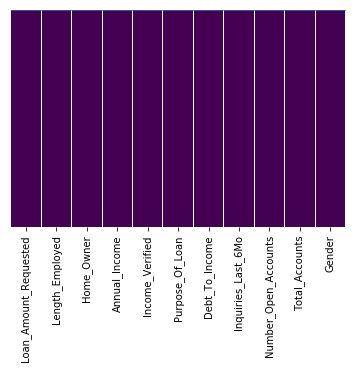

In [111]:
raw_data_test = pd.read_csv("C:/Users/Savita bhabhi/Desktop/ML/AnalyticsVidya/test_fjtUOL8.csv")

raw_data.head()
raw_data.shape

#raw_data[raw_data.columns[:]].corr()['Interest_Rate'][:]

X_testing= raw_data_test
#y = raw_data['Interest_Rate']

X_testing.info()

X_testing=X_testing.drop('Months_Since_Deliquency',axis=1)


X_testing['Home_Owner'].isnull().value_counts()
X_testing['Annual_Income'].isnull().value_counts()
X_testing['Length_Employed'].isnull().value_counts()

y.value_counts()
#Output var looks balanced

X_testing.head()

X_testing_loan_id = X_testing['Loan_ID']

X_testing=X_testing.drop('Loan_ID',axis=1)

X_testing.head()

#X.groupby(['Gender'])['Debt_To_Income'].value_counts(normalize=True)
#L = income.map({' <=50K':0,' >50K':1})
X_testing['Length_Employed'].value_counts()
X_testing['Length_Employed'] = X_testing['Length_Employed'].map({'< 1 year':0,'1 years':1,'2 years':2,'3 years':3,'4 years':4,'5 years':5,'6 years':6,'7 years':7,'8 years':8,'9 years':9,'10+ years':10 })

X_testing['Income_Verified'] = X_testing['Income_Verified'].map( {'not verified': 0, 'VERIFIED - income': 1, 'VERIFIED - income source': 1})



(X_testing['Length_Employed'].replace(r' ', np.nan, regex=True))


X_testing['Home_Owner'].fillna(X_testing['Home_Owner'].mode()[0], inplace=True)
X_testing['Annual_Income'].fillna(X_testing['Annual_Income'].mean(), inplace=True)
X_testing['Length_Employed'].fillna(X_testing['Length_Employed'].mean(),inplace=True)


X_testing['Length_Employed'].isnull().value_counts()

sns.distplot(X_testing['Annual_Income'])

sns.heatmap(X_testing.isnull(),yticklabels=False,cbar=False,cmap='viridis')

X_testing.head(10)
X_testing.columns

X_testing['Home_Owner'].value_counts()

X_testing['Home_Owner'] = X_testing['Home_Owner'].map( {'None': 0, 'Other': 1, 'Rent': 2, 'Mortgage': 3, 'Own': 4})

#sns.distplot(X['Annual_Income'])

X['Annual_Income'] = X['Annual_Income'].apply(lambda x: np.log(x + 1))
X_testing.head()
X_testing['Loan_Amount_Requested'] = pd.to_numeric(X_testing['Loan_Amount_Requested'],errors='coerce')
#X_testing['Loan_Amount_Requested'] = X_testing['Loan_Amount_Requested'].astype(int)


columns_to_norm = ['Loan_Amount_Requested','Length_Employed','Home_Owner','Annual_Income', 'Debt_To_Income','Inquiries_Last_6Mo', 'Number_Open_Accounts', 'Total_Accounts']
scaler = StandardScaler()
X_testing[columns_to_norm] = scaler.fit_transform(X_testing[columns_to_norm])
X_testing.head()

X_testing.skew()

#Onehot Encoding 
from sklearn.preprocessing import OneHotEncoder

X_testing_encoded = pd.get_dummies(X_testing)
#X_encoded = X_encoded.drop(['Workclass_?'], axis=1,inplace =True)
X_testing_encoded.head(10)


X_testing = X_testing_encoded
X.shape

#train_test_split

#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state =42)
#X_train.shape




In [106]:

#from sklearn.ensemble import AdaBoostClassifier
#clf = AdaBoostClassifier()
#clf.fit(X_train,y_train)
#y_final = clf.predict(X_testing)
#print(y_final)


[2 1 2 ... 2 3 1]


In [112]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_final = clf.predict(X_testing)
print(y_final)


[3 2 3 ... 2 3 2]


In [113]:
len(y_final)
#print(df.head())

109541

In [114]:
Loan_ID = pd.DataFrame(X_testing_loan_id)
Y_FINAL = pd.DataFrame(y_final)
df = pd.concat((Loan_ID,Y_FINAL),axis=1)

In [115]:
df.head()

,Loan_ID,0
0,10164310,3
1,10164311,2
2,10164312,3
3,10164313,2
4,10164314,2


In [117]:
df.to_csv(r'C:/Users/Savita bhabhi/Desktop/ML/AnalyticsVidya/RF/submission_file.csv',index=False)